In [53]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [54]:
df=pd.read_csv('final_1930.csv')


In [30]:
df

,Unnamed: 0,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,...,AccountId,Link,Why,What,How,Other,Category,Error Type,Tags,ErrorType with another
0,0,59594521,react-native,1,0,6654570,2,1,0,0,...,8916012.0,NaN,0,0,1.0,0.0,Low,Module Not Found,"npm,react-native,node.js,npm-install,npm-start","UNKNOWN: unknown error, watch"
1,1,67493977,react-native,1,0,5078763,1,0,0,0,...,6570594.0,NaN,1,0,0.0,0.0,High,Exception,"react-native,material-ui,expo",undefined is not an object (evaluating '_react...
2,2,39282377,react-native,1,39451985,5118663,2,5,0,0,...,6629588.0,NaN,1,0,0.0,0.0,Mid,Module Not Found,react-native,@providesModule naming collision:
3,3,55579684,react-native,1,0,11243436,0,1,0,0,...,9355229.0,NaN,1,0,0.0,0.0,Low,Other,"react-native,websocket,socket.io",websocket error
4,4,65566736,react-native,1,0,12525881,0,1,0,0,...,15160761.0,NaN,0,0,1.0,0.0,Low,Module Not Found,"react-native,functional-testing,detox",Cannot connect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,1925,51134078,angular,1,0,9981538,0,2,0,0,...,13402669.0,https://stackoverflow.com/questions/51134078,0,0,0.0,1.0,Low,Type Error,angular,Uncaught (in promise): TypeError: _this.tasks....
1926,1926,51656522,angular,1,51702788,9284962,2,2,0,0,...,12835035.0,https://stackoverflow.com/questions/51656522,1,0,0.0,0.0,High,Type Error,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...
1927,1927,50827738,angular,1,0,5506108,1,0,0,0,...,7212551.0,https://stackoverflow.com/questions/50827738,1,0,0.0,0.0,Low,Type Error,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...
1928,1928,64489530,angular,1,0,14502374,0,3,0,0,...,19801465.0,https://stackoverflow.com/questions/64489530,0,0,0.0,1.0,Low,Type Error,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />


In [31]:
df.columns

Index(['Unnamed: 0', 'QId', 'Library', 'QPostTypeId', 'QAcceptedAnswerId',
       'QOwnerUserId', 'QAnswerCount', 'QCommentCount', 'QFavoriteCount',
       'QCommunityOwnedDate', 'QCreationDate', 'QScore', 'QViewCount',
       'QTitle', 'QBody', 'QTags', 'QStackTrace', 'UserReputation',
       'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl',
       'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId',
       'Link', 'Why', 'What', 'How', 'Other', 'Category', 'Error Type', 'Tags',
       'ErrorType with another'],
      dtype='object')

In [32]:
angular=df[df['Library']=="angular"]
react_native=df[df['Library']=="react-native"]
webpack=df[df['Library']=='webpack']
reactjs=df[df['Library']=='reactjs']
typescript=df[df['Library']=='typescript']

In [33]:
angular

,Unnamed: 0,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,...,AccountId,Link,Why,What,How,Other,Category,Error Type,Tags,ErrorType with another
891,891,55894389,angular,1,55911711,6691953,3,2,0,0,...,8974649.0,NaN,0,0,1.0,0.0,Mid,Module Not Found,"angular,fullcalendar,angular7,server-side-rend...",Element is not defined
892,892,52252918,angular,1,52272087,10274476,1,1,0,0,...,14222750.0,NaN,0,1,0.0,0.0,Low,Type Error,"angular,polymer,polymer-1.0",Cannot read property 'calendar' of undefined
893,893,62863317,angular,1,62864587,11785644,1,0,0,0,...,9851137.0,NaN,0,0,1.0,0.0,Low,Type Error,"angular,angular-material",Class constructor MatCommonModule cannot be in...
894,894,42606470,angular,1,0,6760868,1,4,0,0,...,9081014.0,NaN,1,0,0.0,0.0,High,Exception,"angular,angular-cli",spawn UNKNOWN
895,895,46046014,angular,1,46046240,7876137,1,2,0,0,...,10700697.0,NaN,0,0,1.0,0.0,High,Module Not Found,"javascript,node.js,angular,passport.js","Failed to lookup view ""error"" in views directo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,1925,51134078,angular,1,0,9981538,0,2,0,0,...,13402669.0,https://stackoverflow.com/questions/51134078,0,0,0.0,1.0,Low,Type Error,angular,Uncaught (in promise): TypeError: _this.tasks....
1926,1926,51656522,angular,1,51702788,9284962,2,2,0,0,...,12835035.0,https://stackoverflow.com/questions/51656522,1,0,0.0,0.0,High,Type Error,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...
1927,1927,50827738,angular,1,0,5506108,1,0,0,0,...,7212551.0,https://stackoverflow.com/questions/50827738,1,0,0.0,0.0,Low,Type Error,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...
1928,1928,64489530,angular,1,0,14502374,0,3,0,0,...,19801465.0,https://stackoverflow.com/questions/64489530,0,0,0.0,1.0,Low,Type Error,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />


# Task 2

##  Word Cloud Based on Posted Question Title

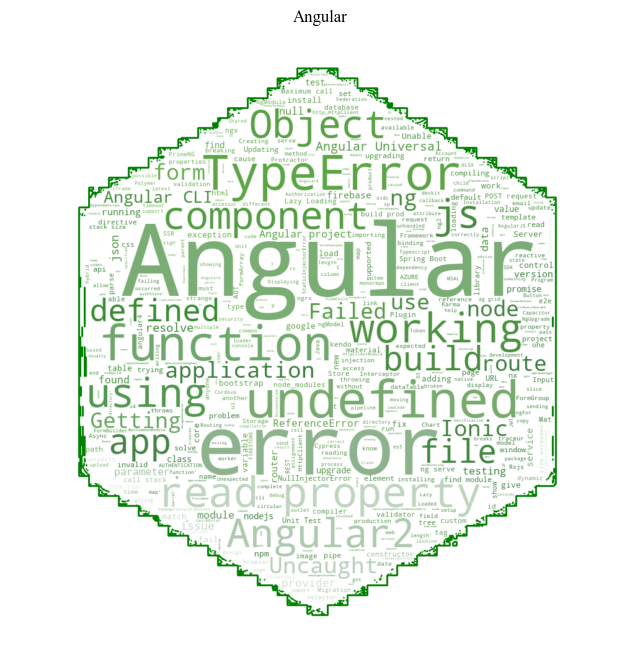

In [34]:

nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = angular['QTitle'].tolist()
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

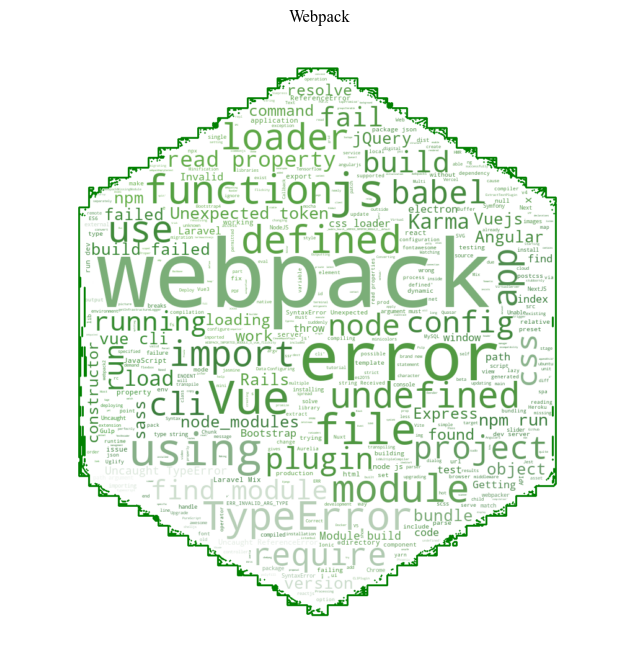

In [35]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = webpack['QTitle'].tolist()
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Webpack')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

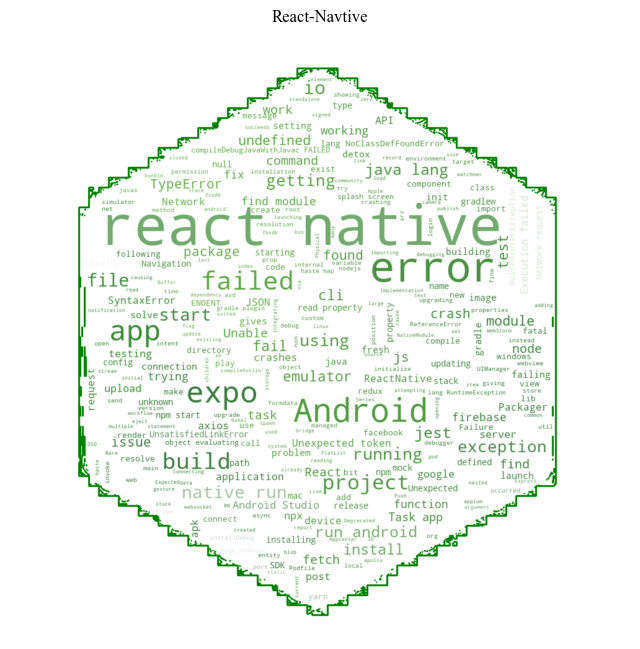

In [36]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = react_native['QTitle'].tolist()
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=300).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Navtive')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

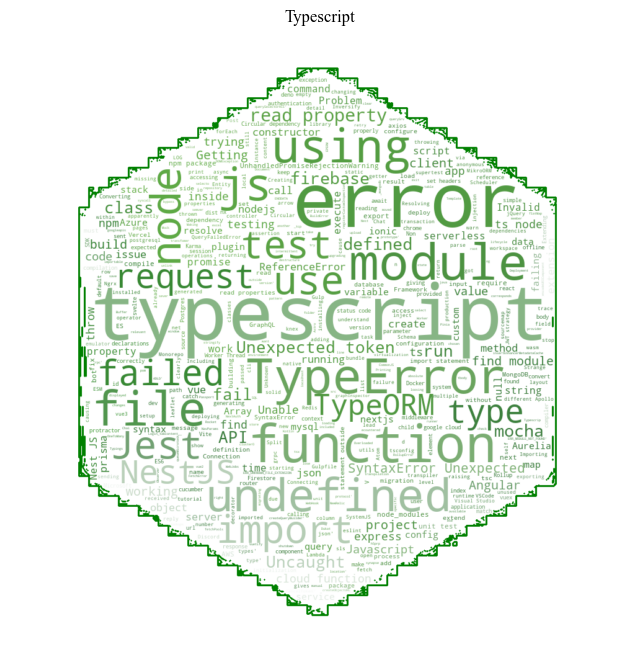

In [37]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = typescript['QTitle'].tolist()
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Typescript')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

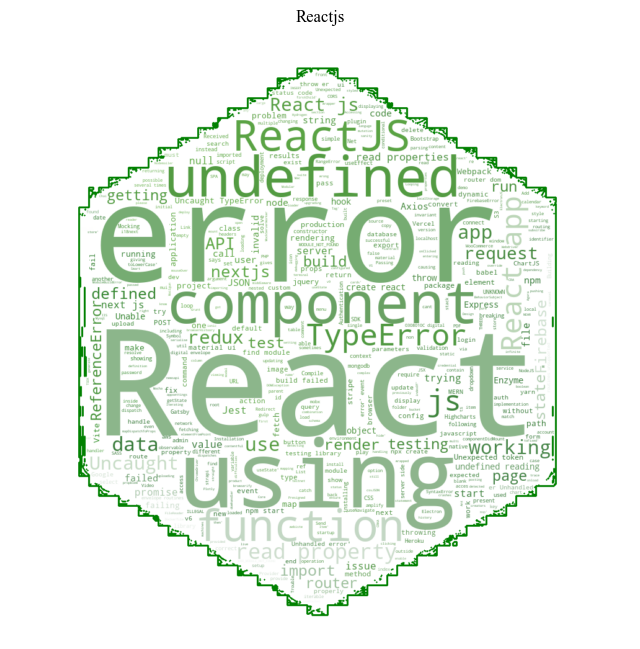

In [38]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = reactjs['QTitle'].tolist()
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Reactjs')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

# Task 3

## Reputation VS view Plot

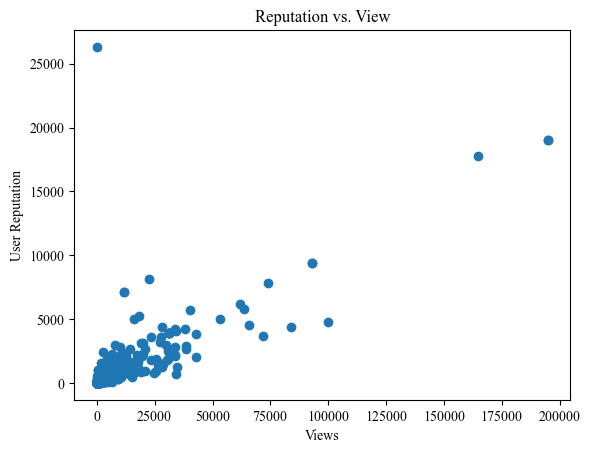

In [39]:
plt.scatter(df['UserReputation'], df['Views'])
plt.xlabel('Views')
plt.ylabel('User Reputation')
plt.title('Reputation vs. View')
plt.show()


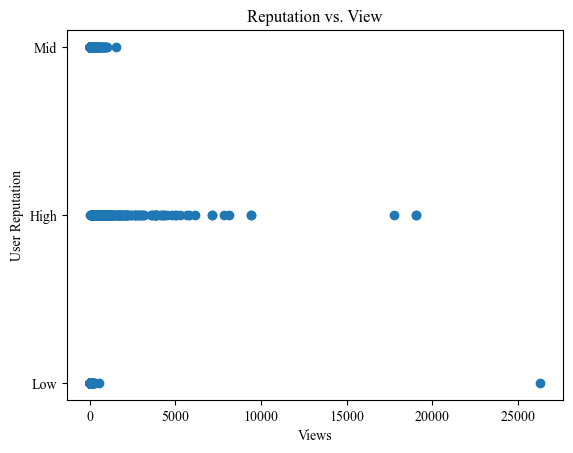

In [40]:
plt.scatter(df['Views'], df['Category'])
plt.xlabel('Views')
plt.ylabel('User Reputation')
plt.title('Reputation vs. View')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

### Most Frequency tag

In [41]:
def convert_to_comma_separated(row):
    return row.replace('><', ',').replace('<', '').replace('>', '')
df['Tags'] = df['QTags'].apply(convert_to_comma_separated)

In [42]:
df

,Unnamed: 0,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,...,AccountId,Link,Why,What,How,Other,Category,Error Type,Tags,ErrorType with another
0,0,59594521,react-native,1,0,6654570,2,1,0,0,...,8916012.0,NaN,0,0,1.0,0.0,Low,Module Not Found,"npm,react-native,node.js,npm-install,npm-start","UNKNOWN: unknown error, watch"
1,1,67493977,react-native,1,0,5078763,1,0,0,0,...,6570594.0,NaN,1,0,0.0,0.0,High,Exception,"react-native,material-ui,expo",undefined is not an object (evaluating '_react...
2,2,39282377,react-native,1,39451985,5118663,2,5,0,0,...,6629588.0,NaN,1,0,0.0,0.0,Mid,Module Not Found,react-native,@providesModule naming collision:
3,3,55579684,react-native,1,0,11243436,0,1,0,0,...,9355229.0,NaN,1,0,0.0,0.0,Low,Other,"react-native,websocket,socket.io",websocket error
4,4,65566736,react-native,1,0,12525881,0,1,0,0,...,15160761.0,NaN,0,0,1.0,0.0,Low,Module Not Found,"react-native,functional-testing,detox",Cannot connect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,1925,51134078,angular,1,0,9981538,0,2,0,0,...,13402669.0,https://stackoverflow.com/questions/51134078,0,0,0.0,1.0,Low,Type Error,angular,Uncaught (in promise): TypeError: _this.tasks....
1926,1926,51656522,angular,1,51702788,9284962,2,2,0,0,...,12835035.0,https://stackoverflow.com/questions/51656522,1,0,0.0,0.0,High,Type Error,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...
1927,1927,50827738,angular,1,0,5506108,1,0,0,0,...,7212551.0,https://stackoverflow.com/questions/50827738,1,0,0.0,0.0,Low,Type Error,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...
1928,1928,64489530,angular,1,0,14502374,0,3,0,0,...,19801465.0,https://stackoverflow.com/questions/64489530,0,0,0.0,1.0,Low,Type Error,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />


In [43]:
from collections import Counter
all_tags = [tag for row in df['Tags'] for tag in row.split(',')]
tag_frequencies = Counter(all_tags)

# Print the frequencies
for tag, freq in tag_frequencies.items():
    print(f'{tag}: {freq}')


npm: 130
react-native: 386
node.js: 367
npm-install: 8
npm-start: 5
material-ui: 6
expo: 64
websocket: 2
socket.io: 5
functional-testing: 1
detox: 6
react-native-navigation: 3
react-native-screens: 1
java: 35
android: 148
android-studio: 17
ios: 23
xcode: 6
reactive-programming: 1
simulator: 1
firebase: 58
macos: 11
export: 2
atom-editor: 3
yalc: 1
javascript: 501
jestjs: 62
asyncstorage: 3
redux-persist: 2
crashlytics: 2
stacktrace.js: 1
watchman: 2
twilio: 2
twilio-programmable-chat: 1
android-gradle-plugin: 3
facebook: 2
react-native-fbsdk: 2
google-cloud-firestore: 15
splash-screen: 2
react-native-ios: 8
axios: 33
gradlew: 2
react-native-image-picker: 1
react-native-flatlist: 1
babeljs: 56
error-handling: 5
gradle: 23
groovy: 1
ts-jest: 6
react-native-elements: 1
react-native-testing-library: 2
cucumberjs: 4
selenium: 5
xpath: 1
appium: 1
mocking: 5
apple-push-notifications: 2
graphql: 12
apollo: 8
development-environment: 1
redux-saga: 2
react-native-web: 1
engine.io: 1
file-uploa

In [44]:
sorted_tag = tag_frequencies.most_common()
tag_freq= pd.DataFrame(sorted_tag, columns=['Tag Name', 'Frequency'])
tag_freq.head(20)

,Tag Name,Frequency
0,javascript,501
1,react-native,386
2,reactjs,386
3,webpack,386
4,typescript,386
5,angular,386
6,node.js,367
7,android,148
8,npm,130
9,vue.js,76


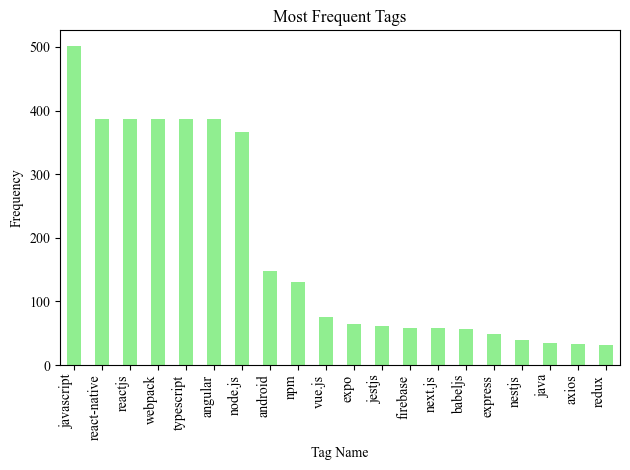

In [56]:

bars=tag_freq.head(20).plot(kind='bar', x='Tag Name', y='Frequency', legend=False, color='lightgreen')
# plt.colorbar(sm)
plt.title("Most Frequent Tags")
plt.xlabel("Tag Name")
plt.ylabel("Frequency")
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.xticks(rotation=90, ha="right") 
plt.tight_layout()
plt.show()

#  Connected Graphs

In [46]:
df

,Unnamed: 0,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,...,AccountId,Link,Why,What,How,Other,Category,Error Type,Tags,ErrorType with another
0,0,59594521,react-native,1,0,6654570,2,1,0,0,...,8916012.0,NaN,0,0,1.0,0.0,Low,Module Not Found,"npm,react-native,node.js,npm-install,npm-start","UNKNOWN: unknown error, watch"
1,1,67493977,react-native,1,0,5078763,1,0,0,0,...,6570594.0,NaN,1,0,0.0,0.0,High,Exception,"react-native,material-ui,expo",undefined is not an object (evaluating '_react...
2,2,39282377,react-native,1,39451985,5118663,2,5,0,0,...,6629588.0,NaN,1,0,0.0,0.0,Mid,Module Not Found,react-native,@providesModule naming collision:
3,3,55579684,react-native,1,0,11243436,0,1,0,0,...,9355229.0,NaN,1,0,0.0,0.0,Low,Other,"react-native,websocket,socket.io",websocket error
4,4,65566736,react-native,1,0,12525881,0,1,0,0,...,15160761.0,NaN,0,0,1.0,0.0,Low,Module Not Found,"react-native,functional-testing,detox",Cannot connect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,1925,51134078,angular,1,0,9981538,0,2,0,0,...,13402669.0,https://stackoverflow.com/questions/51134078,0,0,0.0,1.0,Low,Type Error,angular,Uncaught (in promise): TypeError: _this.tasks....
1926,1926,51656522,angular,1,51702788,9284962,2,2,0,0,...,12835035.0,https://stackoverflow.com/questions/51656522,1,0,0.0,0.0,High,Type Error,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...
1927,1927,50827738,angular,1,0,5506108,1,0,0,0,...,7212551.0,https://stackoverflow.com/questions/50827738,1,0,0.0,0.0,Low,Type Error,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...
1928,1928,64489530,angular,1,0,14502374,0,3,0,0,...,19801465.0,https://stackoverflow.com/questions/64489530,0,0,0.0,1.0,Low,Type Error,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />


In [47]:
# import networkx as nx
# import matplotlib.pyplot as plt

# G = nx.Graph()


# for row in df['Tags']:
#     for i in range(len(row)):
#         for j in range(i + 1, len(row)):
#             G.add_edge(row[i].strip(), row[j].strip())

# plt.figure(figsize=(12,12))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')

# # Display the graph
# plt.rcParams['font.family'] = "Times New Roman"
# plt.title("Connection Graph of Tags", size=15)
# plt.show()


#  Task 4

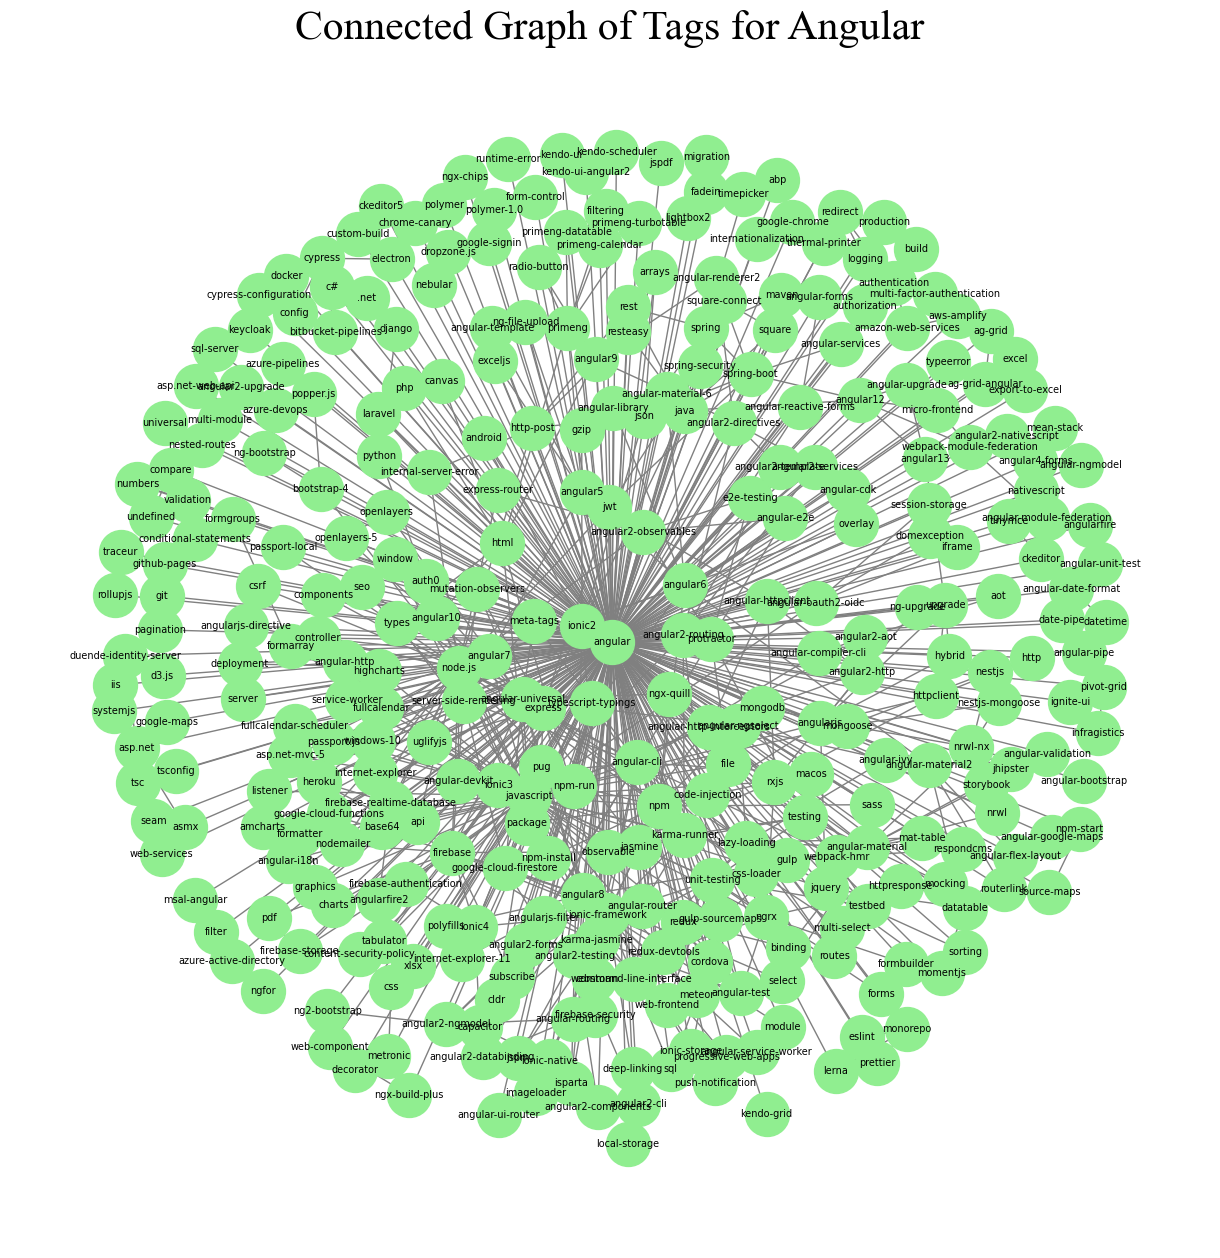

In [48]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



G = nx.Graph()

def add_edges(row):
    tags = row.split(',')
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            G.add_edge(tags[i].strip(), tags[j].strip())

angular['Tags'].apply(add_edges)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=7, font_weight='ultralight', edge_color='gray')

# Display the graph
plt.title("Connected Graph of Tags for Angular", size=30)
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()


In [59]:
import re

def extract_error_type(qbody):
    if isinstance(qbody, str):
        match = re.search(r'Error:\s*(.*)', qbody)
        if match:
            return match.group(1)
    return None


df['Error'] = df['QBody'].apply(extract_error_type)
df_with_errors = df[df['Error'].notna()]
df_with_errors[['QBody', 'Error']].head()

,QBody,Error
0,"<p>I am totally new in React/nodjs world, but ...","UNKNOWN: unknown error, watch"
1,<p>I am using react native and expo 4.4.4 and\...,undefined is not an object (evaluating '_react...
2,<p>This was working previously. But since I up...,@providesModule naming collision:
3,<p>I have an application on React Native and ...,websocket error
4,<p>I've installed Detox on my React Native pro...,Cannot connect


In [89]:

def extract_error_type(qbody):
    if isinstance(qbody, str):
        match = re.search(r"Error: (.+)", qbody)
        if match:
            return match.group(1)
    return None


df['ErrorType'] = df['QBody'].apply(extract_error_type)
df_with_errors = df[df['ErrorType'].notna()]
df_with_errors[['QBody', 'ErrorType']].head()

,QBody,ErrorType
0,"<p>I am totally new in React/nodjs world, but ...","UNKNOWN: unknown error, watch"
1,<p>I am using react native and expo 4.4.4 and\...,undefined is not an object (evaluating '_react...
2,<p>This was working previously. But since I up...,@providesModule naming collision:
3,<p>I have an application on React Native and ...,websocket error
4,<p>I've installed Detox on my React Native pro...,Cannot connect


In [66]:
# df.drop('Unnamed: 0',inplace=True,axis=1)

In [90]:
df


,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,...,Why,What,How,Other,Category,Error Type,Tags,Error,ErrorType,Errorfinal
0,59594521,react-native,1,0,6654570,2,1,0,0,2020-01-04T20:21:40.580,...,0,0,1.0,0.0,Low,Module Not Found,"npm,react-native,node.js,npm-install,npm-start","UNKNOWN: unknown error, watch","UNKNOWN: unknown error, watch",None
1,67493977,react-native,1,0,5078763,1,0,0,0,2021-05-11T20:34:35.273,...,1,0,0.0,0.0,High,Exception,"react-native,material-ui,expo",undefined is not an object (evaluating '_react...,undefined is not an object (evaluating '_react...,None
2,39282377,react-native,1,39451985,5118663,2,5,0,0,2016-09-01T23:43:40.863,...,1,0,0.0,0.0,Mid,Module Not Found,react-native,@providesModule naming collision:,@providesModule naming collision:,None
3,55579684,react-native,1,0,11243436,0,1,0,0,2019-04-08T18:30:15.613,...,1,0,0.0,0.0,Low,Other,"react-native,websocket,socket.io",websocket error,websocket error,None
4,65566736,react-native,1,0,12525881,0,1,0,0,2021-01-04T17:06:19.577,...,0,0,1.0,0.0,Low,Module Not Found,"react-native,functional-testing,detox",Cannot connect,Cannot connect,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,51134078,angular,1,0,9981538,0,2,0,0,2018-07-02T10:29:38.660,...,0,0,0.0,1.0,Low,Type Error,angular,Uncaught (in promise): TypeError: _this.tasks....,Uncaught (in promise): TypeError: _this.tasks....,None
1926,51656522,angular,1,51702788,9284962,2,2,0,0,2018-08-02T14:49:59.923,...,1,0,0.0,0.0,High,Type Error,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...,Uncaught (in promise): TypeError: undefined is...,None
1927,50827738,angular,1,0,5506108,1,0,0,0,2018-06-13T00:55:16.967,...,1,0,0.0,0.0,Low,Type Error,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...,this.sanitizer.bypassSecurityTrustResourceUrl ...,None
1928,64489530,angular,1,0,14502374,0,3,0,0,2020-10-22T19:48:22.360,...,0,0,0.0,1.0,Low,Type Error,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />,Cannot read property 'id' of undefined\n<br />,None


In [64]:
# df.to_csv('final_error_1930.csv')

In [92]:
df.drop('Error Type',axis=1,inplace=True)

In [93]:
df

,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,...,Link,Why,What,How,Other,Category,Tags,Error,ErrorType,Errorfinal
0,59594521,react-native,1,0,6654570,2,1,0,0,2020-01-04T20:21:40.580,...,NaN,0,0,1.0,0.0,Low,"npm,react-native,node.js,npm-install,npm-start","UNKNOWN: unknown error, watch","UNKNOWN: unknown error, watch",None
1,67493977,react-native,1,0,5078763,1,0,0,0,2021-05-11T20:34:35.273,...,NaN,1,0,0.0,0.0,High,"react-native,material-ui,expo",undefined is not an object (evaluating '_react...,undefined is not an object (evaluating '_react...,None
2,39282377,react-native,1,39451985,5118663,2,5,0,0,2016-09-01T23:43:40.863,...,NaN,1,0,0.0,0.0,Mid,react-native,@providesModule naming collision:,@providesModule naming collision:,None
3,55579684,react-native,1,0,11243436,0,1,0,0,2019-04-08T18:30:15.613,...,NaN,1,0,0.0,0.0,Low,"react-native,websocket,socket.io",websocket error,websocket error,None
4,65566736,react-native,1,0,12525881,0,1,0,0,2021-01-04T17:06:19.577,...,NaN,0,0,1.0,0.0,Low,"react-native,functional-testing,detox",Cannot connect,Cannot connect,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,51134078,angular,1,0,9981538,0,2,0,0,2018-07-02T10:29:38.660,...,https://stackoverflow.com/questions/51134078,0,0,0.0,1.0,Low,angular,Uncaught (in promise): TypeError: _this.tasks....,Uncaught (in promise): TypeError: _this.tasks....,None
1926,51656522,angular,1,51702788,9284962,2,2,0,0,2018-08-02T14:49:59.923,...,https://stackoverflow.com/questions/51656522,1,0,0.0,0.0,High,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...,Uncaught (in promise): TypeError: undefined is...,None
1927,50827738,angular,1,0,5506108,1,0,0,0,2018-06-13T00:55:16.967,...,https://stackoverflow.com/questions/50827738,1,0,0.0,0.0,Low,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...,this.sanitizer.bypassSecurityTrustResourceUrl ...,None
1928,64489530,angular,1,0,14502374,0,3,0,0,2020-10-22T19:48:22.360,...,https://stackoverflow.com/questions/64489530,0,0,0.0,1.0,Low,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />,Cannot read property 'id' of undefined\n<br />,None


In [94]:
df.drop('Errorfinal',axis=1,inplace=True)

In [95]:
df

,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,...,AccountId,Link,Why,What,How,Other,Category,Tags,Error,ErrorType
0,59594521,react-native,1,0,6654570,2,1,0,0,2020-01-04T20:21:40.580,...,8916012.0,NaN,0,0,1.0,0.0,Low,"npm,react-native,node.js,npm-install,npm-start","UNKNOWN: unknown error, watch","UNKNOWN: unknown error, watch"
1,67493977,react-native,1,0,5078763,1,0,0,0,2021-05-11T20:34:35.273,...,6570594.0,NaN,1,0,0.0,0.0,High,"react-native,material-ui,expo",undefined is not an object (evaluating '_react...,undefined is not an object (evaluating '_react...
2,39282377,react-native,1,39451985,5118663,2,5,0,0,2016-09-01T23:43:40.863,...,6629588.0,NaN,1,0,0.0,0.0,Mid,react-native,@providesModule naming collision:,@providesModule naming collision:
3,55579684,react-native,1,0,11243436,0,1,0,0,2019-04-08T18:30:15.613,...,9355229.0,NaN,1,0,0.0,0.0,Low,"react-native,websocket,socket.io",websocket error,websocket error
4,65566736,react-native,1,0,12525881,0,1,0,0,2021-01-04T17:06:19.577,...,15160761.0,NaN,0,0,1.0,0.0,Low,"react-native,functional-testing,detox",Cannot connect,Cannot connect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,51134078,angular,1,0,9981538,0,2,0,0,2018-07-02T10:29:38.660,...,13402669.0,https://stackoverflow.com/questions/51134078,0,0,0.0,1.0,Low,angular,Uncaught (in promise): TypeError: _this.tasks....,Uncaught (in promise): TypeError: _this.tasks....
1926,51656522,angular,1,51702788,9284962,2,2,0,0,2018-08-02T14:49:59.923,...,12835035.0,https://stackoverflow.com/questions/51656522,1,0,0.0,0.0,High,"angular,angular6,angular-material-6",Uncaught (in promise): TypeError: undefined is...,Uncaught (in promise): TypeError: undefined is...
1927,50827738,angular,1,0,5506108,1,0,0,0,2018-06-13T00:55:16.967,...,7212551.0,https://stackoverflow.com/questions/50827738,1,0,0.0,0.0,Low,"angular,angular-test",this.sanitizer.bypassSecurityTrustResourceUrl ...,this.sanitizer.bypassSecurityTrustResourceUrl ...
1928,64489530,angular,1,0,14502374,0,3,0,0,2020-10-22T19:48:22.360,...,19801465.0,https://stackoverflow.com/questions/64489530,0,0,0.0,1.0,Low,"node.js,angular,http-post,internal-server-error",Cannot read property 'id' of undefined\n<br />,Cannot read property 'id' of undefined\n<br />
